In [47]:
import pandas as pd
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 5000)
pd.options.mode.chained_assignment = None
import numpy as np
import os

import seaborn as sn
import matplotlib.pyplot as plt

In [8]:
def wavg(group, avg_name, weight_name):
    d = group[avg_name]
    w = group[weight_name]
    try:
        return (d * w).sum() / w.sum()
    except ZeroDivisionError:
        return d.mean()

In [27]:
skill_2d = pd.read_csv('skill_2d.csv').rename( columns={'Unnamed: 0':'job'})
skill_5d = pd.read_csv('skill_5d.csv').rename( columns={'Unnamed: 0':'job'})

lfs = pd.read_csv('file/LFSQ12558.csv')
lfs = lfs[np.isfinite(lfs['APPROX'])]

code = pd.read_csv('file/job code.csv')

### 5D

In [11]:
# salary = pd.DataFrame(data = lfs.groupby(['OCCUP','SEX']).apply(wavg, 'APPROX', 'Weight'), columns = ['salary'])
# salary['count'] = lfs.groupby(['OCCUP','SEX']).count()['APPROX']
# salary['age'] = lfs.groupby(['OCCUP','SEX']).mean()['AGE']
# salary = salary[salary['count'] > 20]
# salary = salary.reset_index()

salary = pd.DataFrame(data = lfs.groupby(['OCCUP']).apply(wavg, 'APPROX', 'Weight'), columns = ['salary'])
salary['count'] = lfs.groupby(['OCCUP']).count()['APPROX']
salary['age'] = lfs.groupby(['OCCUP']).mean()['AGE']
salary = salary[salary['count'] > 20]
salary = salary.reset_index()

In [32]:
sk = pd.merge(left = code, right = skill_5d, left_on = 'Job', right_on = 'job', how = 'inner').drop('Job', axis = 1)

In [36]:
sk_salary = pd.merge(left = sk, right = salary, left_on = 'Code', right_on = 'OCCUP', how = 'inner').drop('OCCUP', axis = 1)

In [37]:
sk_salary

,Code,job,1,2,3,4,5,salary,count,age
0,1111,Legislators,-6.685612,-2.774007,0.774880,2.500952,-0.318197,54075.769904,327,51.064220
1,1112,Senior government officials,3.341109,-5.044423,1.251424,4.574321,2.497804,71160.301010,38,51.026316
2,1113,Traditional chiefs and heads of villages,0.990803,-1.179922,2.813889,3.351200,0.229087,6700.234937,497,48.476861
3,1120,Managing directors and chief executives,2.966054,-5.563426,-1.053021,1.996831,-0.706382,124216.332340,75,49.986667
4,1321,Manufacturing managers,-2.181059,0.386500,0.573683,-0.154861,0.212335,36823.269635,139,43.417266
5,3123,Construction supervisors,-3.395764,-0.886768,0.111683,1.550700,1.978607,19283.206240,149,42.530201
6,1420,Retail and wholesale trade managers,4.002363,1.459983,4.255108,1.784426,-2.554425,54562.407147,117,37.008547
7,1412,Restaurant managers,-3.634243,-0.733153,0.881710,1.864400,-1.264801,23531.157828,22,33.909091
8,1324,"Supply, distribution and related managers",5.905516,1.205481,1.208719,0.541506,0.096733,80298.769777,82,42.939024
9,1330,Information and communications technology serv...,11.149538,-1.824851,-5.359929,-0.773643,0.170513,36751.134770,21,42.523810


In [38]:
sk_salary.to_csv('skill_salary.csv')

### correlation

In [41]:
df = pd.read_csv('skill_salary_mod.csv')

In [42]:
df

,Unnamed: 0,Code,job,1,2,3,4,5,salary,count,age,Literacy,Numeracy,Scientific,ICT,Financial,Cultural and civic,Critical thinking,Creativity,Communication,Collaboration,Curiosity,Initiative,Persistence,Adaptability,Leadership,Social and cultural awareness
0,0,1111,Legislators,-6.685612,-2.774007,0.774880,2.500952,-0.318197,54075.769900,327,51.064220,0.128981,0.094206,0.035503,0.040292,0.069088,0.190696,0.097332,0.030071,0.060593,0.054952,0.099989,0.138600,-0.005135,0.022740,0.179667,0.092267
1,1,1112,Senior government officials,3.341109,-5.044423,1.251424,4.574321,2.497804,71160.301010,38,51.026316,0.161201,0.116834,0.080095,0.171820,0.151368,0.318225,0.121996,0.025471,0.185388,0.106704,0.050353,0.117406,-0.033512,0.012753,0.219201,0.219836
2,2,1113,Traditional chiefs and heads of villages,0.990803,-1.179922,2.813889,3.351200,0.229087,6700.234937,497,48.476861,0.134696,0.140307,0.111150,0.231311,0.050481,0.307075,0.103195,0.102870,0.151904,0.104423,0.024647,0.093464,0.001464,0.064876,0.100864,0.288023
3,3,1120,Managing directors and chief executives,2.966054,-5.563426,-1.053021,1.996831,-0.706382,124216.332300,75,49.986667,0.052115,0.072351,0.119434,0.118100,0.231746,0.105777,0.104607,0.169880,0.160394,0.133024,0.070253,0.078844,0.099692,0.202357,0.236219,0.067169
4,4,1321,Manufacturing managers,-2.181059,0.386500,0.573683,-0.154861,0.212335,36823.269630,139,43.417266,0.138348,0.154006,0.142513,0.250119,0.286011,0.120343,0.191238,0.228453,0.185810,0.237748,0.126013,0.072311,0.153783,0.285813,0.248491,0.079006
5,5,3123,Construction supervisors,-3.395764,-0.886768,0.111683,1.550700,1.978607,19283.206240,149,42.530201,0.085764,0.084071,0.014425,0.151587,0.198079,0.214096,0.057938,0.075296,0.220442,0.096321,0.077332,0.059247,0.109624,0.096606,0.189570,0.096323
6,6,1420,Retail and wholesale trade managers,4.002363,1.459983,4.255108,1.784426,-2.554425,54562.407150,117,37.008547,0.076773,0.162547,0.081488,0.261404,0.302872,0.126494,0.144194,0.121605,0.134847,0.139160,0.039343,0.049067,0.052220,0.161359,0.162593,0.132524
7,7,1412,Restaurant managers,-3.634243,-0.733153,0.881710,1.864400,-1.264801,23531.157830,22,33.909091,0.093213,0.139773,0.070540,0.127670,0.169362,0.189037,0.108448,0.083858,0.099940,0.137127,0.039237,0.026869,0.006283,0.139976,0.180084,0.134018
8,8,1324,"Supply, distribution and related managers",5.905516,1.205481,1.208719,0.541506,0.096733,80298.769780,82,42.939024,0.077558,0.086440,0.219711,0.114790,0.157468,0.075032,0.197158,0.078102,0.179604,0.189014,0.111397,0.095324,0.121949,0.194820,0.153169,0.149329
9,9,1330,Information and communications technology serv...,11.149537,-1.824851,-5.359929,-0.773643,0.170513,36751.134770,21,42.523810,0.137806,0.146322,0.192622,0.431359,0.239225,0.176701,0.251711,0.204663,0.502968,0.315104,0.122209,0.151326,0.104515,0.208942,0.265537,0.233253


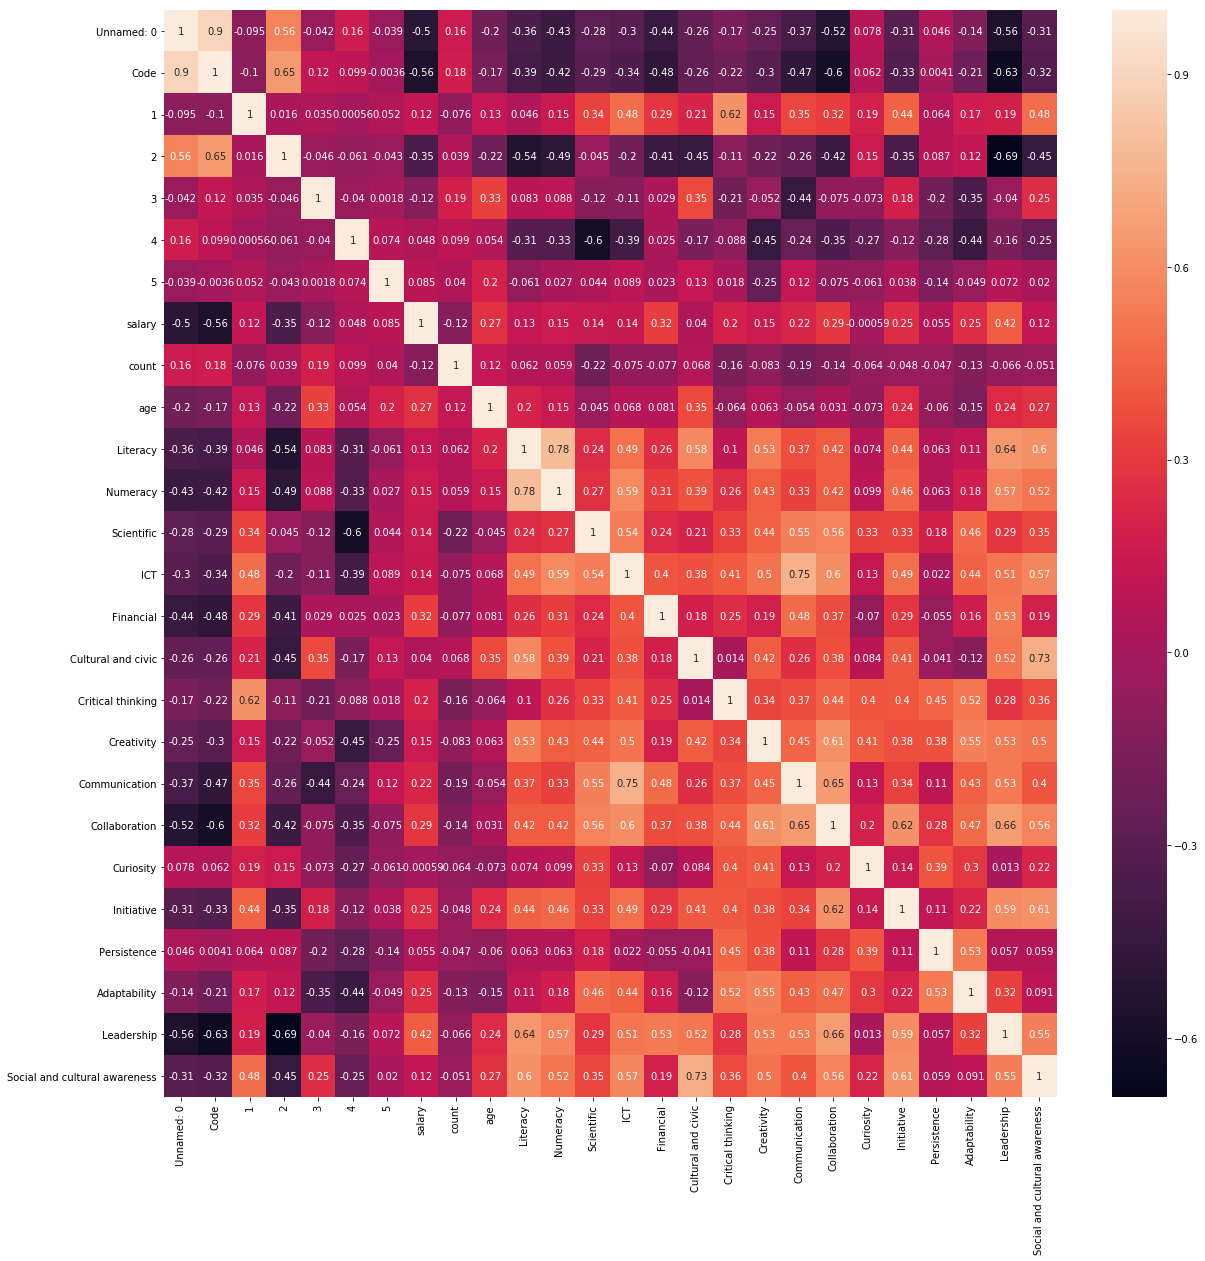

In [49]:
corrMatrix = df.corr()
fig, ax = plt.subplots(figsize=(20,20))
sn.heatmap(corrMatrix, annot=True)